<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         5993 non-null   object 
 1   Day_of_week                  5993 non-null   object 
 2   Age_band_of_driver           5993 non-null   object 
 3   Sex_of_driver                5992 non-null   object 
 4   Educational_level            5643 non-null   object 
 5   Vehicle_driver_relation      5746 non-null   object 
 6   Driving_experience           5595 non-null   object 
 7   Type_of_vehicle              5511 non-null   object 
 8   Owner_of_vehicle             5762 non-null   object 
 9   Service_year_of_vehicle      4019 non-null   object 
 10  Defect_of_vehicle            3791 non-null   object 
 11  Area_accident_occured        5874 non-null   object 
 12  Lanes_or_Medians             5793 non-null   object 
 13  Road_allignment   

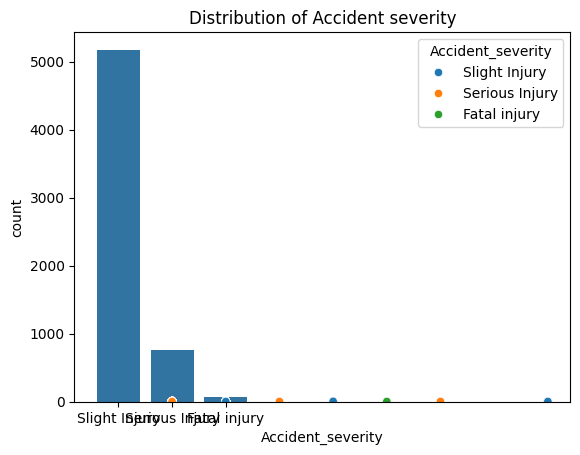

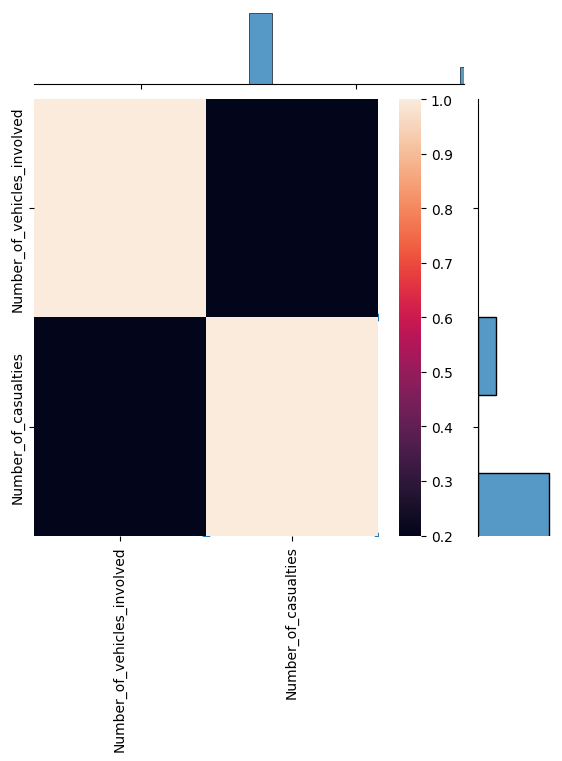

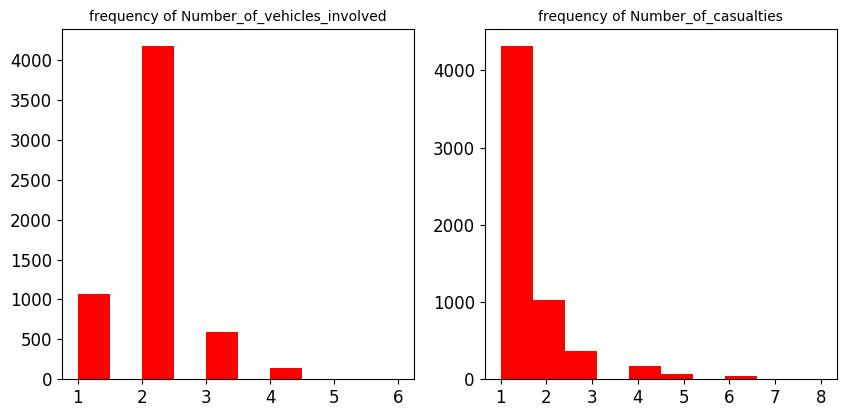

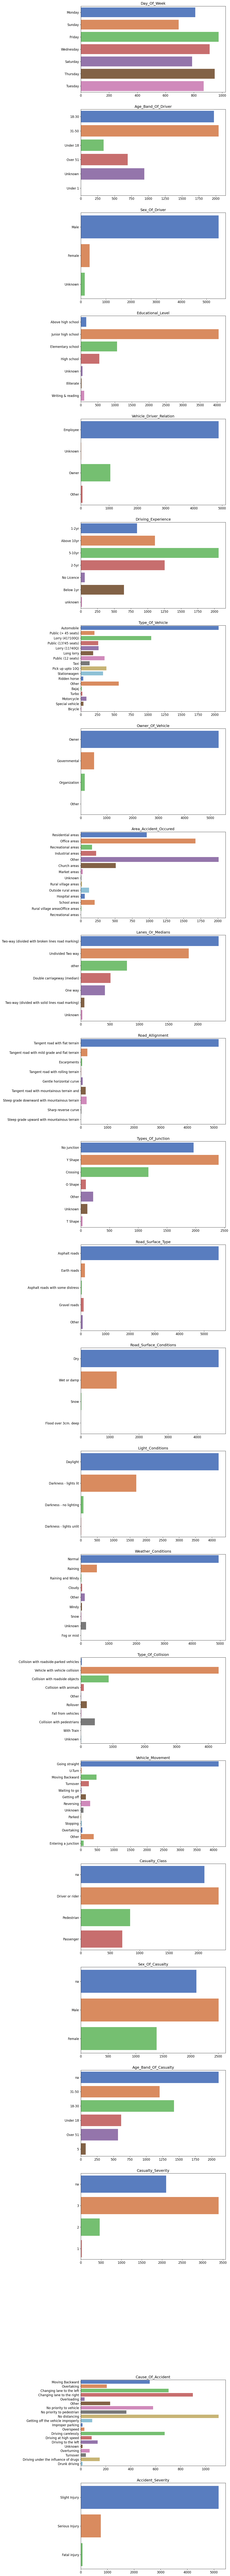

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#load and read the file
df=pd.read_csv(r'/content/RTA Dataset.csv')
df.head()
df.shape
df.describe()
df.describe(include="all")
df.info()
df.duplicated().sum()
df['Accident_severity'].value_counts()
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')
#checking missing values
df.isna().sum()
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'],
        axis = 1, inplace = True)
df.head()
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)
df.corr()
sns.heatmap(df.corr())
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1
#count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1